In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.model_selection import KFold, cross_val_score
from statistics import mode

 
%matplotlib inline

In [2]:

train_data_path="/kaggle/input/disease-prediction-using-machine-learning/Testing.csv"
test_data_path="/kaggle/input/disease-prediction-using-machine-learning/Training.csv"
train_data=pd.read_csv(train_data_path).dropna(axis=1)
test_data=pd.read_csv(test_data_path).dropna(axis=1)

test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


<function matplotlib.pyplot.show(close=None, block=None)>

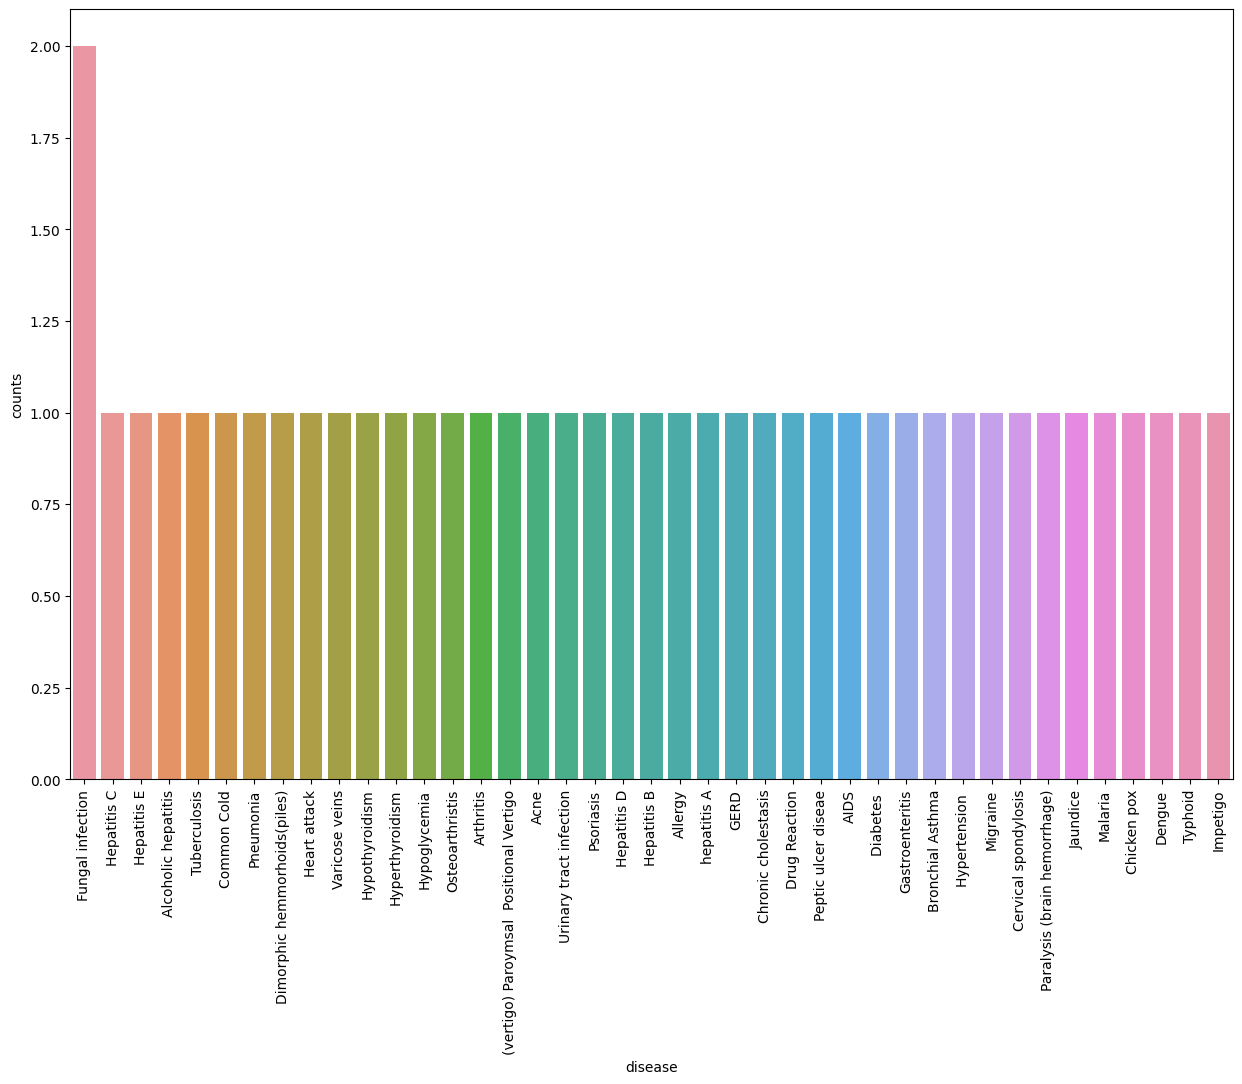

In [3]:
disase_counts=train_data['prognosis'].value_counts()
temp_dataframe=pd.DataFrame({
    'disease': disase_counts.index,
    'counts':disase_counts.values    
})

temp_dataframe
plt.figure(figsize=(15,10))
sns.barplot(x='disease',y='counts',data=temp_dataframe)
plt.xticks(rotation=90)
plt.show


In [4]:
# verileri sayılar bir değere dönüştürmemiz gerekir progrnosisteki verileri çünkü veriler string türünde onları sayısal veri türüne dönüştürmemiz gerekir
# string veri türünü sayısal veriye dönüştürmek icin labelencoder kullanabiliriz


encoder=LabelEncoder()
train_data['prognosis']=encoder.fit_transform(train_data['prognosis'])
test_data['prognosis']=encoder.fit_transform(test_data['prognosis'])
train_data
test_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,35


In [5]:
# burda verileri istenilen diğer veriler olarak x, y değeri ise prognasis altındaki sayısal verileri temsil eder.
x=train_data.iloc[:,:-1]
y=train_data.iloc[:,-1]


# verilerin 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)


- Using K-Fold Cross-Validation Model

In [6]:
# ilk olarak k-foldda kullanmak icin  puanlama metriğini hesaplamamız gerekir

def cv_scoring(estimator,x,y):
    return accuracy_score(y, estimator.predict(x))

models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
}

# bu aşamada puanlar üretilir

for model_name in models:
    model = models[model_name]
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)  # Düzenli KFold kullanımı
    scores = cross_val_score(model, x, y, cv=kfold, scoring=cv_scoring, n_jobs=-1)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
Mean Score: 0.025
Gaussian NB
Scores: [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
Mean Score: 0.025
Random Forest
Scores: [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
Mean Score: 0.025


Accuracy on test data by SVM Classifier: 0.0


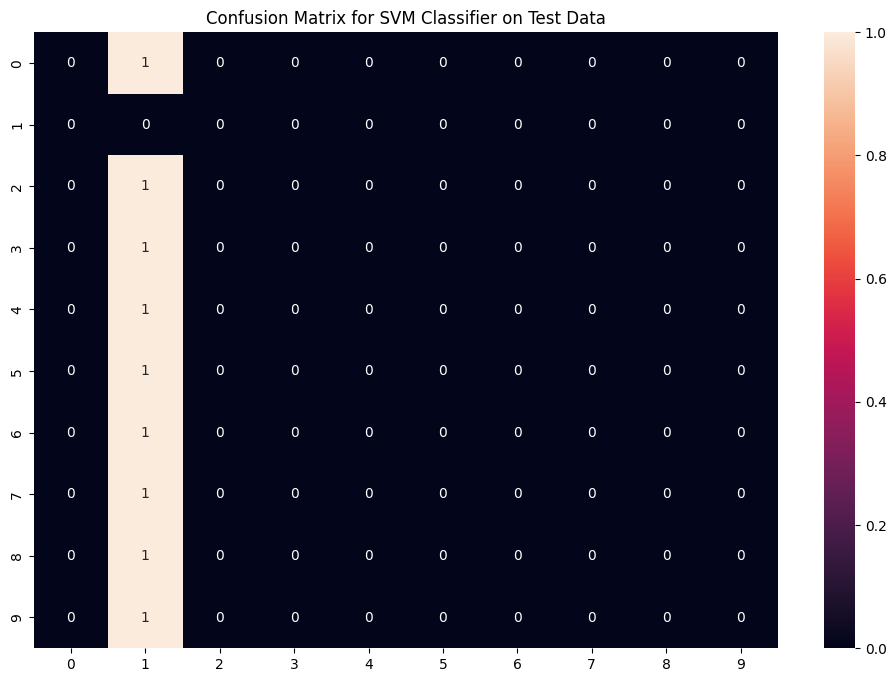

In [7]:
# ilk olarak svm model eğitimini yapalım
svmModel=SVC()
svmModel.fit(x_train,y_train)
preds=svmModel.predict(x_test)

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")


cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

Accuracy on train data by Naive Bayes Classifier: 100.0


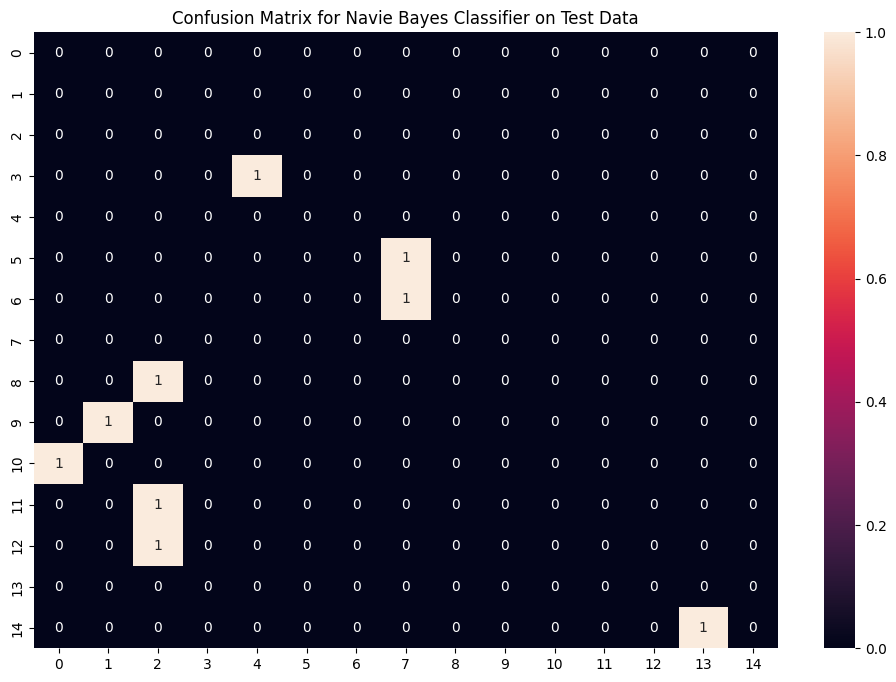

In [8]:
# Naive Bayes Classifier with training data

nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nbModelPredict=nb_model.predict(x_test)

print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(x_train))*100}")

cf_matrix=confusion_matrix(y_test, nbModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Navie Bayes Classifier on Test Data")
plt.show()

Accuracy on test data by Random Forest Classifier: 0.0


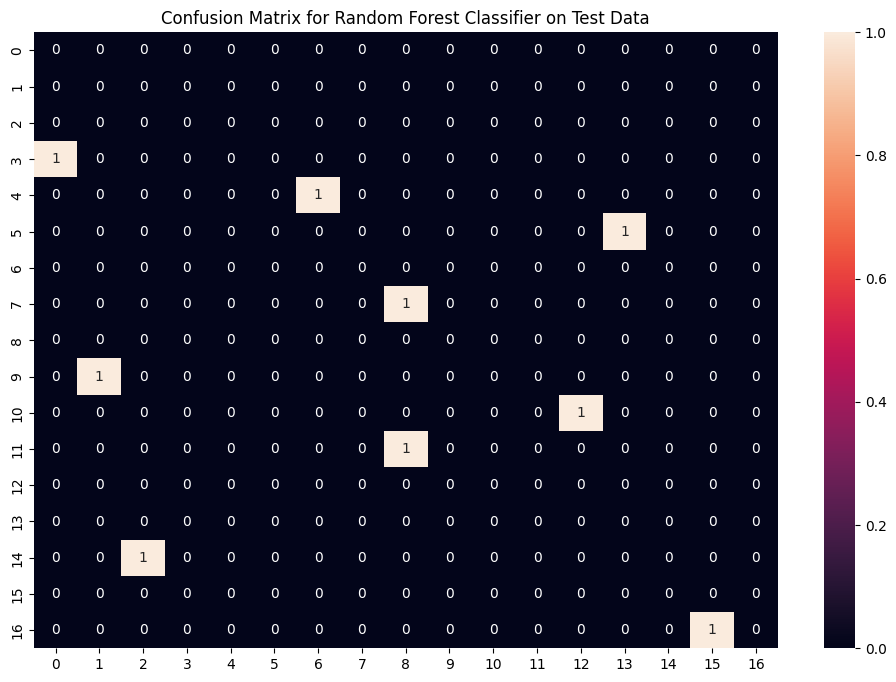

In [9]:
# Son olarak ta Random Forest Calssifier ile veri eğitimi

randomForestModel=RandomForestClassifier(random_state=18)
randomForestModel.fit(x_train,y_train)
randomForestModelPredict=randomForestModel.predict(x_test)

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix=confusion_matrix(y_test, randomForestModelPredict)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

- Şimdi ise tüm verilerimizi birleştirerek eğitim verisinde eğitip test verisinde test edeceğiz

Accuracy on Test dataset by the combined model: 100.0


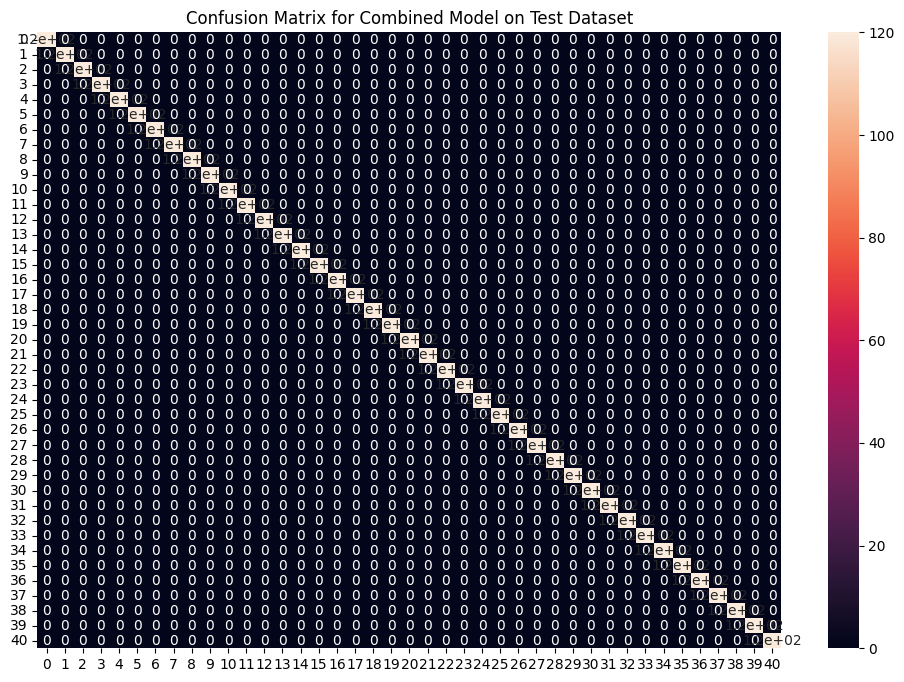

In [10]:

svmModelFit = SVC()
nbModelFit = GaussianNB()
rfModelFit = RandomForestClassifier(random_state=18)

svmModelFit.fit(x, y)
nbModelFit.fit(x, y)
rfModelFit.fit(x, y)

test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1]

svmPredicts = svmModelFit.predict(test_x)
nbModelPredicts = nbModelFit.predict(test_x)
rfModelPredicts = rfModelFit.predict(test_x)

# Mode function with handling for no clear mode
def safe_mode(lst):
    try:
        return mode(lst)
    except:
        return max(set(lst), key=lst.count)

final_preds = [safe_mode([i, j, k]) for i, j, k in zip(svmPredicts, nbModelPredicts, rfModelPredicts)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [11]:
symptoms = x.columns.values

# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}


def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		

	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][rfModelFit.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][nbModelFit.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][svmModelFit.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
test_symptoms = "Itching,Skin Rash,Nodal Skin Eruptions"
test_predictions = predictDisease(test_symptoms)
print(test_predictions)
warnings.filterwarnings("ignore", category=UserWarning)


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'F'}


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
